<a href="https://colab.research.google.com/github/VIVEK818713/Data-Cleaning/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Preprocessing
* Data 
  * text
  * Image
  * Audio
  * Video
* Data Preprocessing is a process to convert raw data into meaningful data using different techniques.

* Why Data Preprocessing is important?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/train.csv')
df.shape

* There are 81 columns but we can not see all
* And same for the rows (1460) but we can not see all
* so for this we will use pd. set_option()

In [ ]:
pd.set_option('display.max_columns',None)# for display all columns
pd.set_option('display.max_rows',None)# for display all rows

In [ ]:
df

In [ ]:
#pd.describe_option()  documentation

* Now if you need all information about the dataset then use df.info()

In [ ]:
df.info()

* Now check how many missing values are there in each feature

In [ ]:
df.isnull().sum()

* this data is something confusing to understand so lets go for visulaize it by using heatmap

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull())

* if you observe the heatmap , the white color shows the missing values and we have to clean this
* so to remove missing values we use different type of techniques
* if you obsreve that where we get True value we get white color and where we have False value the color is black
* Now we will calculate %age and try to remove the missing value

In [ ]:
null_var=df.isnull().sum()/df.shape[0]*100 
# we know shape has columns and rows so we are taking only columns thats why we use 0 in shape
null_var

* here we are observing that there are many columns which have missing values
* here we will extarct that columns which have more than 20% missing values
* you can take your own assumption for the same

In [ ]:
df_null_var=null_var[null_var>20].keys() # keys for columns name
df_null_var

* but if you observe that column name LotFrontage has 17 % missing values and it is single column with this %age
* so we can change our condition

In [ ]:
df_null_var=null_var[null_var>17].keys() # keys for columns name
df_null_var

# Now drop the columns

In [ ]:
df_drop_col=df.drop(columns=df_null_var)
print(df_drop_col.columns)
df_drop_col.shape

* now if you want to check that howmuch data is clean
* use seaborn, and you will see many of the missing values we have removed

In [ ]:
sns.heatmap(df_drop_col.isnull())

* there are some missing values avilable 
* so we will use another technique for that.
* here we can use dropna()

In [ ]:
df2=df_drop_col.dropna()
df2.shape

* now once again visulaize your data

In [ ]:
sns.heatmap(df2.isnull())

* you can observe that there is no missing values in the data set
* you can check it 

In [ ]:
df2.isnull().sum()

In [ ]:
df2.isnull().sum().sum()

* as we see that we clean our data
* did we do right or worng so check it by observe the distribution of data
* for this purpose we can use sns.distplot()
* you can use matplotlib also or pandas but sns.distpolt is quite good
* But remember displot use numeric data so first collect the columns which are int and float data types
* so first check which columns has such data types

In [ ]:
df2.select_dtypes(include=['int','float']).columns


* so we will take only one column for the understanding of distplot
* here we will use first original data frame
* and after that we will take clean data frame(drop_na)
* we will check the difference

In [ ]:
sns.distplot(df['MSSubClass'])# original before removing missing values
plt.show()

In [ ]:
sns.distplot(df2['MSSubClass'])#  after removing missing values
plt.show()

* lets overlap these two graph for understanding

In [ ]:
sns.distplot(df['MSSubClass'])
sns.distplot(df2['MSSubClass'])
plt.show()

* but we have around 36 column so now do all distplot 
* take all numeric columns

In [ ]:
num_var=['Id','MSSubClass','LotArea','OverallQual', 'OverallCond',
         'YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
         'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
         'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
         'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
         'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
         'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']
plt.figure(figsize=(15,25))
for i , var in enumerate(num_var):
  plt.subplot(9,5,i+1)
  sns.distplot(df[var],bins=20)
  sns.distplot(df2[var],bins=20)
plt.show()


In [ ]:
len(num_var)

# Filling Missing Values

## get data set from your google drive
* Make sure your dataset is in you google drive
* Right click on that file (in Google Drive)
* click option get link or get shareable link
* please copy the link
* get the permission as your desired peoples list
* please change code **uc?export=download&id=** inplace of file/d/
* otherwise it may be produce an error
* Now paste in a variable name like data_path in colab

In [ ]:
data_path='https://drive.google.com/file/d/1-4r0z1QMKt9WJ-Xo0T9-4-88i2y-kv9K/view?usp=sharing'     #15dec
df=pd.read_csv(data_path)

In [ ]:
data_path='https://drive.google.com/uc?export=download&id=1-4r0z1QMKt9WJ-Xo0T9-4-88i2y-kv9K'
df=pd.read_csv(data_path)

In [ ]:
df.head()

* our motive is now fill the missing values
* for this purpose we have to check missing values
* as we have done it earlier

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

* But there are many rows and columns and you want to see all

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df.head()

In [ ]:
df.shape

* As we drop that columns which have 20 or more than 20% missing values in previous
* we will apply same as here


In [ ]:
null_var=df.isnull().sum()/df.shape[0]*100 
# we know shape has columns and rows so we are taking only columns thats why we use 0 in shape
null_var

In [ ]:
df_null_var=null_var[null_var>20].keys() # keys for columns name
df_null_var

* Now drop these columns first

In [ ]:
df_drop_col=df.drop(columns=df_null_var)
df_drop_col.shape

* Now focus on Numeric data

In [ ]:
df_num_var=df_drop_col.select_dtypes(include=['int','float'])
df_num_var.head()

* Now plot Haetmap

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df_num_var.isnull())

* if we observe the heatmap then there are some variable which have missing values
* so we have to work on them now we are not going to drop them
* we will fill the missing value

In [ ]:
df_num_var.isnull().sum()

* if you want to know how many variable are there with greater than 0 missing value


In [ ]:
df_miss_num=[var for var in df_num_var.columns if df_num_var[var].isnull().sum()>0]
df_miss_num

* Before filling missing values lets check the distribution of data

In [ ]:
plt.figure(figsize=(5,5))
sns.set()
for i,var in enumerate(df_miss_num):
  plt.subplot(2,2,i+1)
  sns.distplot(df_num_var[var],bins=20,kde_kws={'linewidth':5,'color':'r'})
plt.show()

* Now lets try fill missing values first with mean

In [ ]:
df_num_fill_mean=df_num_var.fillna(df_num_var.mean())
df_num_fill_mean.isnull().sum().sum()

* lets check the distribution plot after imputing the mean value

In [ ]:
plt.figure(figsize=(5,5))
sns.set()
for i,var in enumerate(df_miss_num):
  plt.subplot(2,2,i+1)
  sns.distplot(df_num_var[var],bins=20,kde_kws={'linewidth':5,'color':'r'})
  sns.distplot(df_num_fill_mean[var],bins=20,kde_kws={'linewidth':3,'color':'g'})
plt.show()

* Now lets try fill missing values first with median

In [ ]:
df_num_fill_median=df_num_var.fillna(df_num_var.median())
df_num_fill_median.isnull().sum().sum()

* now plot Data distribution after filling missing values using median

In [ ]:
plt.figure(figsize=(5,5))
sns.set()
for i,var in enumerate(df_miss_num):
  plt.subplot(2,2,i+1)
  sns.distplot(df_num_var[var],bins=20,kde_kws={'linewidth':5,'color':'r'})
  sns.distplot(df_num_fill_median[var],bins=20,kde_kws={'linewidth':3,'color':'g'})
plt.show()

* lets take 3 together
1. original
2. with mean 
3. with median

In [ ]:
plt.figure(figsize=(5,5))
sns.set()
for i,var in enumerate(df_miss_num):
  plt.subplot(2,2,i+1)
  sns.distplot(df_num_var[var],hist=False,bins=20,kde_kws={'linewidth':5,'color':'r'})
  sns.distplot(df_num_fill_mean[var],hist=False,bins=20,kde_kws={'linewidth':3,'color':'g'})
  sns.distplot(df_num_fill_median[var],hist=False,bins=20,kde_kws={'linewidth':3,'color':'k'})
plt.show()

* if you observe the plot there is major changes except first LotFrontage
* here you can take mean or median both doing well
* but when we should take mean and when to choose median
* so you can observe the difference between maen and median when there is outliar in the data set
* You can check the outliers with the help of boxplot
* Boxplot help very much in outliers case

In [ ]:
for i,var in enumerate(df_miss_num):
  plt.figure(figsize=(10,10))
  plt.subplot(3,1,1)
  sns.boxplot(df[var])
  plt.subplot(3,1,2)
  sns.boxplot(df_num_fill_mean[var])
  plt.subplot(3,1,3)
  sns.boxplot(df_num_fill_median[var])
# missing L3

* if you want to concate all three dataset and check the values..

In [ ]:
df_concat=pd.concat([df[df_miss_num],df_num_fill_mean[df_miss_num],df_num_fill_median[df_miss_num]],axis=1)

In [ ]:
df_concat[df_concat.isnull().any(axis=1)]

# Numeric Missing Values Imputation By Class
* Data missing should be around 5% then we should go for this technique
* And missing values in the data frame should be randomly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path='https://drive.google.com/uc?export=download&id=1-4r0z1QMKt9WJ-Xo0T9-4-88i2y-kv9K'
df=pd.read_csv(data_path)

In [ ]:
df.shape

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df.head()

In [ ]:
null_var=df.isnull().sum()/df.shape[0]*100

In [ ]:
df_null_var=null_var[null_var>20].keys() # keys for columns name
df_null_var

In [ ]:
df_drop_null_col=df.drop(columns=df_null_var)
df_drop_null_col.shape

In [ ]:
df2_num=df_drop_null_col.select_dtypes(include=['int','float'])
df2_num.shape

in df2_num columns if any column have greater than 0 missing values
* get that columns

In [ ]:
df2_num_var=[i for i in df2_num.columns if(df2_num[i].isnull().sum()>0)]
df2_num_var

There are 3 numerical columns which have missing values thar are-

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [ ]:
df.head(1)

* when you try for impute value by class you must have domain knowledge
* if you dont have domain knowledge then you can not impute the best.
* if you check 
1. 'LotFrontage'-->there are 2 categorical variable namly'LotShape' and 'LotConfig' so we are taking LotCOnfig for imputation
2. 'MasVnrArea', -->we are choosing MasVnrType(you can choose ant categorical variable which most suitable)
3. 'GarageYrBlt'-->we are choosing GarageType(you can choose any categorical variable which is most suitable)

* Lets understand one by one stepswise

In [ ]:
# firstly we are working on 'LotCOnfig' variable
# first check the unique value in this column
df['LotConfig'].unique()

* there are 5 unique value ['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
* lets build a logic for 'Inside'
* after that we will build for all the class values

In [ ]:
# df.loc[:,'Lotconfig'] ---first reach the 'all rows and Lotconfig Column'
# df.loc[:,'Lotconfig']=='Inside'---all the rows which have Inside we will get
# this data is from df so use below to see what values we have
# df[df.loc[:,'Lotconfig']=='Inside']
df[df.loc[:,'LotConfig']=='Inside']

* if you observe now we have data related to LotConfig with inside values 

In [ ]:
# but we need only LotFrontage columns which belong to Lotconfig 'Inside' value
df[df.loc[:,'LotConfig']=='Inside']['LotFrontage']

* if you observe that there are NaN present so
* we have to take mean value of this and impute this mean value 
* we will use replace() where Nan is there in LotFrontage
* here we use replace it will take 2 argument
1. np.nan
2. df[df.loc[:  ,'LotConfig']=='Inside']['LotFrontage'] 
* but df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'] we need its mean value so 
* df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'].mean()

In [ ]:
df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'].replace(np.nan,df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'].mean())

* if you observe that we have impute the mean value with class
* but we use only 1 class value "Inside" of LotConfig 
* we have use all rest 4 class values of LotConfig 
* Lets do it and make a simple logic for all
* But before this you should make a copy of dataframe
* and you should use dataframe.update () also
* observe the code 

In [ ]:
# make copy of df
df_copy=df.copy()
for var_class in df['LotConfig'].unique():# apply unique value of LotConfig
# use update()
  df_copy.update(df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'].replace(np.nan,df[df.loc[:,'LotConfig']=='Inside']['LotFrontage'].mean()))

* check whether we imputed correct or not

In [ ]:
df_copy.isnull().sum()

* we impute but LotFrontage showing 125 not imputed 
* lets impute all the missing value
* copy above code
* where we use 'Inside' use var_class because we are using a for loop

In [ ]:
# make copy of df
df_copy=df.copy()
for var_class in df['LotConfig'].unique():# apply unique value of LotConfig
# use update() and use var_class inplace of 'Inside'
  df_copy.update(df[df.loc[:,'LotConfig']==var_class]['LotFrontage'].replace(np.nan,df[df.loc[:,'LotConfig']==var_class]['LotFrontage'].mean()))

In [ ]:
df_copy.isnull().sum()

* Now we have to impute **'LotFrontage', 'MasVnrArea', 'GarageYrBlt'** nan values using **Lotconfig,MasVnrType,GarageType** all classes

In [ ]:

# make copy of df
df_copy=df.copy()
# First create two list for numerical vraiable
# And categorical Variable
num_vars=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars=['LotConfig','MasVnrType','GarageType']
# At the same time we need 1 categorical variable and 1 numerical variable
# so we will use zip()
for num_v , cat_v in zip(num_vars,cat_vars):
  for var_class in df[cat_v].unique():# apply unique value of categorical variable
# use update() and use var_class inplace of 'Inside'
# where we use Lotconfig use cat_v
# where we use LotFronage use num_v in below code
    #df_copy.update(df[df.loc[:,'LotConfig']==var_class]['LotFrontage'].replace(np.nan,df[df.loc[:,'LotConfig']==var_class]['LotFrontage'].mean()))
    df_copy.update(df[df.loc[:,cat_v]==var_class][num_v].replace(np.nan,df[df.loc[:,cat_v]==var_class][num_v].mean()))

* now check whether all vaule of numerical variable imputed by classes or not

In [ ]:
df_copy[num_vars].isnull().sum()

* if you observe only LotFrontage is imputed well
* MasVnrArea and GarageYrBlt not imputed all values why?
* The reason is it may be that MasVnrArea and GarageYrBlt not imputed beacause 'MasVnrType',and 'GarageType'have NaN value 
* lets check is it happend with us or not

In [ ]:
df_copy['MasVnrType']

In [ ]:
df_copy[df_copy[['MasVnrType']].isnull().any(axis=1)]

* so before imputing the value you should check
* whether the categorical variable clean or not means there is no missing value
* if categorical variable have missing value then you can not get the desired result
* so now for the understanding purpose we will choose categorical variable which has no missing value
* well we are going to take any categorical variable which has no missing value
* Note-- you must have the domain knowledge for this purpose . here we taking variable(Exterior2nd,KitchenQual) just for imputing the value.

In [ ]:

df_copy=df.copy()
num_vars=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars=['LotConfig','Exterior2nd','KitchenQual']

for num_v , cat_v in zip(num_vars,cat_vars):
  for var_class in df[cat_v].unique():
    df_copy.update(df[df.loc[:,cat_v]==var_class][num_v].replace(np.nan,df[df.loc[:,cat_v]==var_class][num_v].mean()))

In [ ]:
df_copy[num_vars].isnull().sum()

# Distribution plot with mean value

In [ ]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(num_vars):
  plt.subplot(2,2,i+1)
  sns.distplot(df[var],bins=20,kde_kws={'linewidth':5,'color':'r'},label="Original")
  sns.distplot(df_copy[var],bins=20,kde_kws={'linewidth':3,'color':'g'},label="Imputed")
  plt.legend()
plt.show()

# Distribution plot with median value

In [ ]:

df_copy_median=df.copy()
num_vars=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars=['LotConfig','Exterior2nd','KitchenQual']

for num_v , cat_v in zip(num_vars,cat_vars):
  for var_class in df[cat_v].unique():
    df_copy_median.update(df[df.loc[:,cat_v]==var_class][num_v].replace(np.nan,df[df.loc[:,cat_v]==var_class][num_v].median()))

In [ ]:
df_copy_median[num_vars].isnull().sum()

In [ ]:
plt.figure(figsize=(10,10))
sns.set()
for i,var in enumerate(num_vars):
  plt.subplot(2,2,i+1)
  sns.distplot(df[var],bins=20,kde_kws={'linewidth':5,'color':'r'},label="Original")
  sns.distplot(df_copy_median[var],bins=20,kde_kws={'linewidth':3,'color':'g'},label="Imputed")
  plt.legend()
plt.show()

# Missing Value Imputation --Categorical Values

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/train.csv')
df.shape

* As we required only categorical variable so select them

In [ ]:
cat_var=df.select_dtypes(include='object')
cat_var.head(1)

In [ ]:
cat_var_miss_per=cat_var.isnull().mean()*100
cat_var_miss_per

In [ ]:
drop_col=[i for i in cat_var.columns if cat_var_miss_per[i]>20]
drop_col

In [ ]:
cat_var.drop(columns=drop_col,axis=1,inplace=True)
cat_var.shape

In [ ]:
isnull_cat_var=cat_var.isnull().mean()*100
miss_var=isnull_cat_var[isnull_cat_var>0].keys()
miss_var

In [ ]:
cat_var['MasVnrType'].fillna('Missing')

In [ ]:
cat_var['MasVnrType'].mode()

In [ ]:
cat_var['MasVnrType'].value_counts()

In [ ]:
cat_var['MasVnrType'].fillna(cat_var['MasVnrType'].mode()[0])

In [ ]:
for i in miss_var:
  cat_var[i].fillna(cat_var[i].mode()[0],inplace=True)
  print(i,"=",cat_var[i].mode()[0])

In [ ]:
cat_var.isnull().sum()

## Plot 

In [ ]:
plt.figure(figsize=(16,9))
for i,var in enumerate(miss_var):
  plt.subplot(4,3,i+1)
  plt.hist(cat_var[var],label="imputed")
  plt.hist(df[var].dropna(),label="original")
  plt.legend()

## Update dataframe

In [ ]:
df.update(cat_var)
df.drop(columns=drop_col,inplace=True)

In [ ]:
df.select_dtypes(include='object').isnull().sum()

# Filling Missing Values using SimpleImputer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/test.csv')
print("train shape",train.shape)
print("train shape",test.shape)

In [ ]:
X_train=train.drop(columns="SalePrice")# X_train consider as matrix
y_train=train["SalePrice"] # y_train consider as vector
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)


In [ ]:
num_var=X_train.select_dtypes(include=["int","float"]).columns
num_var

In [ ]:
X_train[num_var].isnull().sum()

In [ ]:
imputer_mean=SimpleImputer(strategy='mean')
# imputer_mean=SimpleImputer(strategy='constant',fill_value=99)

In [ ]:
imputer_mean.fit(X_train[num_var])

In [ ]:
imputer_mean.statistics_

* now we have mean value but this mean value not imputed in our dataset so use transform()

In [ ]:
imputer_mean.transform(X_train[num_var])

* we give dataframe but sklearn return array
* But we can canvert np array to data frame

In [ ]:
X_train[num_var]=imputer_mean.transform(X_train[num_var])
# when we impute train data at the same time we have to impute test data
test[num_var]=imputer_mean.transform(test[num_var])

In [ ]:
X_train[num_var].isnull().sum()

In [ ]:
test[num_var].isnull().sum()

# now fill missing values in categorical variable

In [ ]:
cat_var=X_train.select_dtypes(exclude=["int","float"]).columns
cat_var

In [ ]:
X_train[cat_var].isnull().sum()

In [ ]:
imputer_mode=SimpleImputer(strategy='most_frequent')
# imputer_mean=SimpleImputer(strategy='constant',fill_value=99)
imputer_mode

In [ ]:
imputer_mode.fit(X_train[cat_var])

In [ ]:
imputer_mode.statistics_

In [ ]:
X_train[cat_var]=imputer_mode.transform(X_train[cat_var])
# when we impute train data at the same time we have to impute test data
test[cat_var]=imputer_mode.transform(test[cat_var])

In [ ]:
X_train[cat_var].isnull().sum()

In [ ]:
test[cat_var].isnull().sum()

* We have data in the numerical variable and categorical variable
* And we have to impute values using sklearn 
* we use stratigies like mean, median,mode
* But this strategies are apply all the varibale 
* Lets take a situation where we have 20 numerical variable and we want to apply mean on 5 variable meadian on 15 variable or it may be possible that we want to apply mode on another variable 
* So SimpleImputer can not do this task we should go for another technique

# Different Strategy for Different Variable using
1. SimpleImputer
2. Pipeline
3. ColumnTransformer

###Column Transformer is a sciket-learn class used to create and apply separate transformers for numerical and categorical data. 

###To create transformers we need to specify the transformer object and pass the list of transformations inside a tuple along with the column on which you want to apply the transformation.

###(Name, Object, Columns)

##Machine Learning Pipelines
###Machine learning pipelines are a mechanism that chains multiple steps together so that the output of each step is used as input to the next step.

###It means that it performs a sequence of steps in which the output of the first transformer becomes the input for the next transformer. If you have studied a little bit about neural networks then you can visualize the pipeline workflow that output of 1 layer feed as input for next layer.

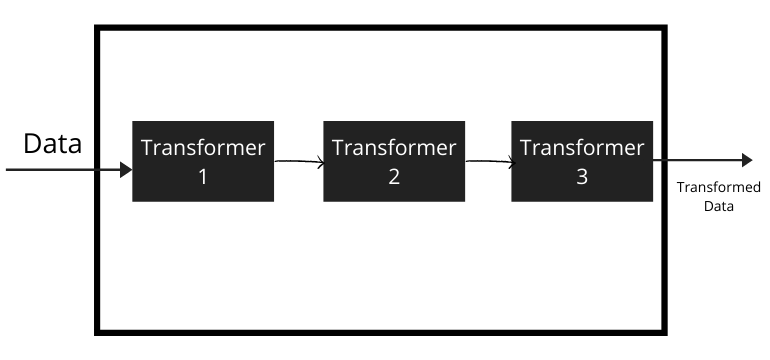

###Suppose for example you are working on a Machine learning project which has a too messy dataset containing missing values, categorical variables so you will first handle these problems and then train the model. But using Pipeline, you can chain all these 3 steps in a single step, making the project workflow smooth and easier.

###Pipelines make it easy to apply the same preprocessing to train and test data. If you have previously deployed any machine learning model without using pipelines to any cloud server then you can experience how much complexities it creates to handle new data coming from a server.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/test.csv')
print("train shape",train.shape)
print("train shape",test.shape)

In [ ]:
X_train=train.drop(columns="SalePrice",axis=1)# X_train consider as matrix
y_train=train["SalePrice"] # y_train consider as vector
X_test=test.copy()
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)

# Missing Value Imputation

In [ ]:
# First check the missing value in X_train
X_train_isnull=X_train.isnull().sum()
X_train_isnull

* Now Check Numeric variable in the X_train

In [ ]:
# Now collect numeric variable
num_var=X_train.select_dtypes(include=['int','float']).columns
# Now collect those numeric columns which have missing values
num_var_miss=[i for i in num_var if X_train_isnull[i]>0]
num_var_miss

* Now check categorical variable having missing value

In [ ]:
cat_var=X_train.select_dtypes(include=['object']).columns
cat_var_miss=[i for i in cat_var if X_train_isnull[i]>0]
cat_var_miss

### so now we have numeric variable 'LotFrontage', 'MasVnrArea', 'GarageYrBlt'
* And you want to use **mean in 'LotFrontage'***

* and median in ***'MasVnrArea', 'GarageYrBlt'***

### in categorical variable 
* 'Alley',
* 'MasVnrType',
* 'BsmtQual',
* 'BsmtCond',
* 'BsmtExposure',
* 'BsmtFinType1',
* 'BsmtFinType2',
* 'Electrical',
* 'FireplaceQu'   
 **you want to use mode strategies**

### And for columns
* 'GarageType',
* 'GarageFinish',
* 'GarageQual',
* 'GarageCond',
* 'PoolQC',
* 'Fence',
* 'MiscFeature' 
 
 **you want to impute any constant value**

### By using Simple Imputer we can not do this so we will go for pipeline

In [ ]:
num_var_mean=['LotFrontage']
num_var_median=['MasVnrArea','GarageYrBlt']
cat_var_mode=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure',
              'BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu']
cat_var_constant=['GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature']

### Now we have decided which strategies will apply on which variable
### This is time for create Pipeline

In [ ]:
# in pipeline you should take steps parameter it will be in list then tuple
num_var_mean_imputer=Pipeline(steps=[("Imputer",SimpleImputer(strategy='mean'))])
num_var_median_imputer=Pipeline(steps=[("Imputer",SimpleImputer(strategy='median'))])
cat_var_mode_imputer=Pipeline(steps=[("Imputer",SimpleImputer(strategy='most_frequent'))])
cat_var_constant_imputer=Pipeline(steps=[("Imputer",SimpleImputer(strategy='constant',fill_value='Missing'))])

In [ ]:
Pipeline()

### we have decided the strategies but we did not mention on which variable we have to apply this.
### So here the role of colomntranformer come into the picture

In [ ]:
# ColumnTransformer(name,strategy,column name) 
preprocess=ColumnTransformer(transformers=[("mean_imputer",num_var_mean_imputer,num_var_mean),
                                ("median_imputer",num_var_median_imputer,num_var_median),
                                ("mode_imputer",cat_var_mode_imputer,cat_var_mode),
                                ("constant_imputer",cat_var_constant_imputer,cat_var_constant)])

### Now we have to fit diffrent whic straegies and on which column 
### fit on X_train

In [ ]:
preprocess.fit(X_train)

In [ ]:
preprocess.transform

### Now check which mean, median and mode value calculated by fit()

In [ ]:
# preprocess.named_transformers_
# tell which estimator columns startegy we should take in ColumnTransformer
# preprocess.named_transformers_["mean_imputer"]
#now tell the steps which we define in Pipeline
# preprocess.named_transformers_["mean_imputer"].named_steps["Imputer"]
# now check what is the statistics
# preprocess.named_transformers_["mean_imputer"].named_steps["Imputer"].statistics_
preprocess.named_transformers_["mean_imputer"].named_steps["Imputer"].statistics_

### so we get the first variable LotFrontage mean value
### yu can check whether it is righ mean or not by pandas

In [ ]:
train['LotFrontage'].mean()

* Now we have to transform all above startegies on main data frame
* after applying transform () we will get clean data X_train
* but we have to transfoem X_test data as well

In [ ]:
X_train_clean=preprocess.transform(X_train)
X_test_clean=preprocess.transform(X_test)

* check the value of X_train_clean
* but it will give you 2 D nparray not dataframe
* so you have to convert it into dataframe

In [ ]:
X_train_clean

In [ ]:
preprocess.transformers_ 
# observe output drop[0,1,2... what is this?]

* you know that X_train_clean is a 2D nparray so we dont want this so we have to convert it into dataframe
* when we use pd.DataFrame() we have to give X_train_clean as parameter
* And columns also but whwn you work on columns then you have to use right sequence 
* But where is the sequence?
* so for this goto ColumnTransformer , what is sequence you give here you will use it like
1. num_var_mean
2. num_var_median
3. cat_var_mode
4. cat_var_constant
* And concate them observe the code

In [ ]:
X_train_miss_var=pd.DataFrame(X_train_clean,columns=num_var_mean+num_var_median+cat_var_mode+cat_var_constant)

In [ ]:
X_train_miss_var.head()

In [ ]:
X_train_miss_var.isnull().sum().sum()# check whether imputed or not

* Now check how many value imputed in X_train_miss_var dataset with train dataset

In [ ]:
train['Alley'].value_counts() # original data set

In [ ]:
X_train_miss_var['Alley'].value_counts()#after imputed dataset

* we checked in only Alley variable you can check any varible which you imputed above

* so now you have cleaned the data set but in cleaned data set there are some variable which have missing value
* our task is to join clean data set with the original dataset(tarin and test) and make an extended dataset
* This is you Assignment

In [ ]:
# no missing values variables index
remainder_vars_index = [0,
   1,
   2,
   4,
   5,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   27,
   28,
   29,
   34,
   36,
   37,
   38,
   39,
   40,
   41,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   61,
   62,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   75,
   76,
   77,
   78,
   79]

In [ ]:
# get no missing values variables name using there index
remainder_vars = [X_train_isnull.keys()[var_index] for var_index in remainder_vars_index]
remainder_vars

In [ ]:
len(remainder_vars)

In [ ]:
# concatinate X_train_clean_miss_var df and remainder_vars
X_train =  pd.concat([X_train_miss_var,train[remainder_vars]], axis=1)

In [ ]:
X_train.shape

In [ ]:
X_train.isnull().sum().sum()

In [ ]:
# Create test DataFrame with missing value imputed variables
X_test_clean_miss_var = pd.DataFrame(X_test_clean, columns=num_var_mean+num_var_median+cat_var_mode+cat_var_constant)
X_test_clean_miss_var.shape

In [ ]:
X_test_clean_miss_var.isnull().sum().sum()

In [ ]:
# concatinate X_test_clean_miss_var df and remainder_vars
X_test =  pd.concat([X_test_clean_miss_var,test[remainder_vars]], axis=1)
X_test.shape

In [ ]:
X_test.isnull().sum().sum()

In [ ]:
# 22 <= What is this, in X_test df still missing values as available but why 
#because we fill missing values in those columns which have missing value present in only X_train df
# Basicaly we get df then  find missing values variables then split df into X_train, X_test, y_train, y_test
# after that we fill missing value

# so if you have train and test df seperatly then first thing you should concatnate then find the missing 
# values variables it's is great strategy and carry on
# so you can try yourself

In [ ]:
isnull_sum_test = X_test.isnull().sum()
isnull_sum_test

In [ ]:
# finding the numerical variable which have mising value
num_vars_test = X_test.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss_test = [var for var in num_vars_test if isnull_sum_test[var]>0]
num_vars_miss_test

In [ ]:
# finding the categorical variable which have mising value
cat_vars_test = X_test.select_dtypes(include=["O"]).columns
cat_vars_miss_test = [var for var in cat_vars_test if isnull_sum_test[var]>0]
cat_vars_miss_test

In [ ]:
# Hey it's time to do yourself

#Categorical Variable Encoding

## Dummy Variables & One-Hot Encoding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## How to use kaggle dataset in colab

### Fisrt go to ***kaggle.com***
### then go to ***'My Account'***
### scroll down and you will see ***API*** heading
### Now click on *** create new API token***
### so it will download you a json file of kaggle which is *** kaggle.json***
### it has a user name which is your kaggle account name and a API key in dictionary form.
### Now you have to upload this json file in the colab 
### then create an environment for this 
### import os
### os.environ['KAGGLE_CONFIG_DIR'] and now set your json file path only don't use file name we need only the path means we need only the folder which contain kaggle.json file
### os.environ['KAGGLE_CONFIG_DIR']='/content'
### now goto your dataset in kaggle lets search for 'titanic'. and click on the desired one 
### then goto data tab and you will see a one specific command , copy that 
### and paste it in the colab for downloading which is like below and use ! sign before it
### *** ! kaggle competitions download -c titanic
### when you run this your all files will be downloaded in colab you can check and do your work
## but some time dataset is in not csv it may be it is in zip file 
### for example search for heart disease UCI in kaggle but if you observe then you will not see any specific command so what to do?
### ok you just click on three dots and click on copy API command

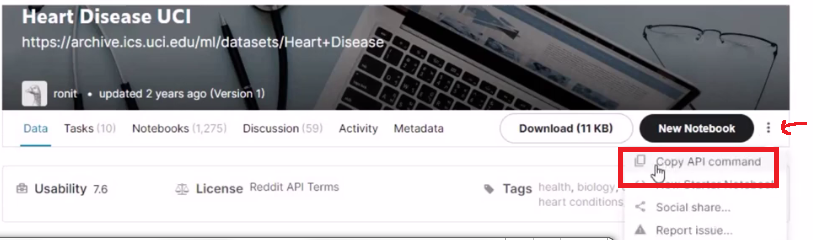

### and put that particular thing on your colab with ! sign like below
### ***! kaggle datasets download -d cherngs/heart-disease-cleveland-uci***
### and run it then you will get a zip file in colab you can check it
### so it is a zip file so you have to unzip it by the use of below code
### ***! unzip heart-disease-uci*** and you will get your desired csv file now
### if you want to unzip and as well remove the zip file from the google then use this linux command
## ! unzip \.*zip && rm *.zip 
## All is done .

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/Colab Notebooks/Kaggle json'

In [ ]:
!kaggle datasets download -d jsphyg/tipping

In [ ]:
! unzip tipping

In [ ]:
df=pd.read_csv('/content/tips.csv')
df.head()

* we use mathemetical formula in machine learning for build a model
* So we need only numeric data but in the dataset it may be there are some cotegorical data also
* for example in our dataset(ENCODE_tips) we have 4 categorical variable so should we skip these variable from dataset?
* No, because if we drop these column then result will be affected for example we know that male pay more than female and if we observe that many of us go to resturant on saturday or sunday and very less time on other days. so we can not drop them.
* for this we have to convert the nominal data into numeric one . but we can not give male to 1 and female to 2 because mathmetically 2 is higher than 1. so what to do?
* for such type of situation we create 2 columns one for male class and one for female calss.

* so we have to make 2 duumies variable for the same we can say.
* if there is male value is present then we will put 1 and male is not there female is there then in the male column we will put 0. same will be performed for the female column.

* so for a particular class value is presnt then we will put 1 and not presnt then we put 0 so this method is called ONE HOT ENCODING. 
* NOTE--ONE HOT ENCODING always apply on NOMINAL CATEGORICAL VARIABLE.
* Lets go for it

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
dummy_df=pd.get_dummies(df)
dummy_df(2)

* observe the data farme, now we have 13 columns
* it made two new columns sex_female and sex_male 
* And it removed column 'sex'
* ANd it did same for smoker,day, and time
* this is called k dummy variables means it creates columns for classes present in categorical variable

* lets understand other parameters of get_dummy()
* pd.get_dummies(
    * data,
    * prefix=None,
    * prefix_sep='_',
    * dummy_na=False,
    * columns=None,
    * sparse=False,
    * drop_first=False,
    * dtype=None,






)

In [ ]:
dummy_df=pd.get_dummies(df,drop_first=True)
dummy_df

In [ ]:
dummy_df=pd.get_dummies(df,drop_first=True,prefix="tips")
dummy_df

In [ ]:
dummy_df=pd.get_dummies(df,drop_first=True,prefix="tips",prefix_sep="-->")
dummy_df

In [ ]:
# dummy_na will create an extra column for missing value
# if column has missing value than it have 1 otherwise 0
# in our case there is no missing value so no need to use it
# but for undersatnding purpose we are using it
dummy_df=pd.get_dummies(df,drop_first=True,prefix="tips",prefix_sep="-->",dummy_na=True)
dummy_df

In [ ]:
df.isnull().sum()

In [ ]:
# if you have idea which column should be use in one hot encoding
# then you can use column parameter and put the columns name in list
# for example we are taking only 2 columns
dummy_df=pd.get_dummies(df,drop_first=True,prefix="tips",prefix_sep="-->",columns=['sex','time'])
dummy_df

In [ ]:
# if you need sparse metrix then use sparse parameter otherwise leave it
dummy_df=pd.get_dummies(df,drop_first=True,sparse=True)
dummy_df

In [ ]:
# if you need to change the datatype then use dtype parameter otherwise leave it
dummy_df=pd.get_dummies(df,drop_first=True,dtype='int')
dummy_df

In [ ]:
dummy_df.dtypes

# One-Hot Encoding with Scikit-learn

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oh_enc = OneHotEncoder(sparse=False,drop='first',handle_unknown='error')

In [ ]:
oh_enc_arr = oh_enc.fit_transform(df[['sex','smoker','day','time']])
oh_enc_arr

## it will return us a numpy array so after some time you can convert it into dataframe

In [ ]:
dummy_df.keys()

In [ ]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['sex_Female', 'sex_Male', 'smoker_No',
       'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur',
       'time_Dinner', 'time_Lunch'])
oh_enc_df

# Types of Categorical Variable
1. Ordinal
2. Nominal

## ordinal Variable
* Ordinal variable are categorical variable in which the categories can be meaningfully ordered
* we can scale and measure ordinal variable.
* when the ordinal variable convert into the number then it has mathematical value.
* like Grade A,B,C,D,E,F
* Quality Poor, Good ,Very Good, Excellent
* Month Jan,Feb,Mar.....

## Nominal Variable
* Nominal variable can not be measure.
* All label are equal so there is no order.
* No mathematical value
* like color-->Red, Green, Black ...
* product-->laptop, Bag, Mouse,Mobile....
* Language-->C,Python, Java....

# Label Encoding And Ordinal Encoding

* label Encoding apply on Nominal and ordinal categorical variables.
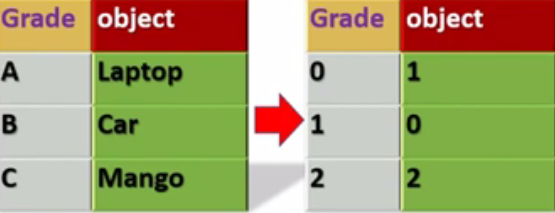

* Ordinal Encoding Apply on Ordinal Categorical variable.
* 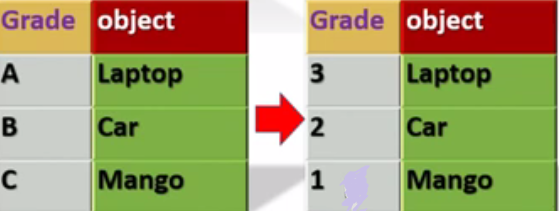


In [ ]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder # you can also use OrdinalEncoder

In [ ]:
pd.set_option("display.max_rows",None)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/ENCODE_tips.csv')
df.head()

In [ ]:
# here we are just understanding the label encoding
df2=df[['day','time']]

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit_transform(df2["day"])
# it will give us nparray

In [ ]:
df2["day_L_En"]=le.fit_transform(df2["day"])

In [ ]:
df2["time_L_En"]=le.fit_transform(df2["time"])

In [ ]:
df2.head()

In [ ]:
df['day'].value_counts()

In [ ]:
df2['day_L_En'].value_counts()

In [ ]:
df['time'].value_counts()

In [ ]:
df2['time_L_En'].value_counts()

# Order labeling

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA CLEANING/ENCODE_tips.csv')
df.head()

In [ ]:
df2=df[['day','time']]
# here we are just understanding the label encoding
le_ord=LabelEncoder()

In [ ]:
order_Label1 = {"Fri":2,"Thur":1,"Sat":4,"Sun":3}
order_Label2 = {"Dinner":2,"Lunch":1}

In [ ]:
df2["day_Ord_En"] = df2["day"].map(order_Label1)
df2["time_Ord_En"] = df2["time"].map(order_Label2)

In [ ]:
df2

# Project using pipeline